### matplotlib 차트 유형

1. histogram : 연속형값의 도수(빈도수/개수) 파악
2. bar plot : 범주형값의 개수, 또는 다른 연속값을 파악
3. scatter plot : 산포도(산점도) 두 연속값들의 분표 파악
4. line plot : 시계열데이터(연속값) 변화 파악
5. box plot : 연속형 값의 사분위, 이상치 파악
6. pie chart : 전체 범위 중의 비율

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

font_path = '/Users/hwangjunho/Desktop/encore_skn11/04_data-analysis/03_matplotlib/AppleSDGothicNeo.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

##### Histogram

- 연속형 값을 일정 구간을 나누어 구간별 데이터포인트의 빈도를 시각화
    - x축 : 연속형 데이터
    - y축 : 구간별 데이터포인트의 개수(합)

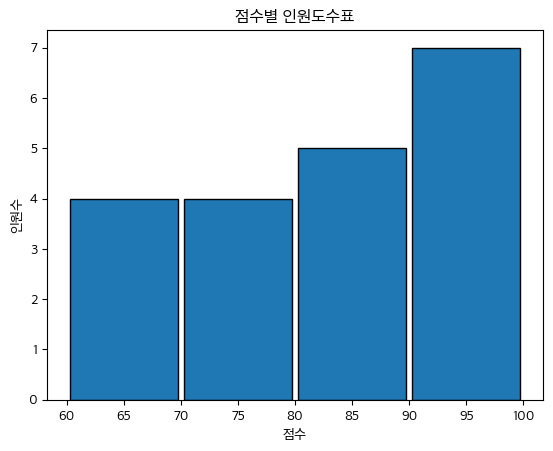

In [28]:
scores = [100, 95, 97, 98, 99, 90, 80, 81, 84, 88, 70, 78, 79, 70, 65, 66, 61, 64, 100, 89]

bins = [60, 70, 80, 90, 100]

plt.hist(scores, bins=bins, edgecolor='black', rwidth=0.95)
# bins = 나뉠 구간의 개수 (기본값 = 10)
# edgecolor : 히스토그램 막대의 경계선 색상
# rwith : 0~1 사이의 값으로 상대적 너비 조정

plt.xlabel('점수')
plt.ylabel('인원수')
plt.title('점수별 인원도수표')
plt.show()

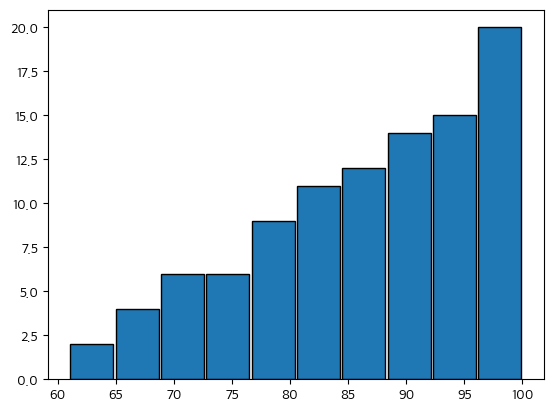

In [29]:
plt.hist(scores, edgecolor='black', rwidth=0.95, cumulative=True)
# cumulative : 누적 값
plt.show()